## Elbow Method - Clustering

### 1.  Data Preparation

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
print(data.head())

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### 2.  Implementing K-means Clustering

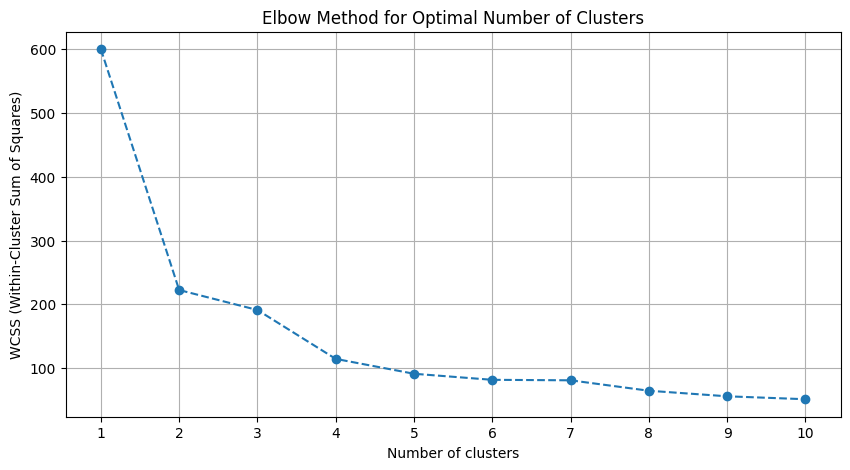

In [3]:
from sklearn.cluster import KMeans

# List to store WCSS values for different numbers of clusters
wcss = []

# Run K-means for 1 to 10 clusters and calculate WCSS
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


### 3.  Using the Elbow Method

The "elbow" point is where the reduction in WCSS starts to slow down, indicating that adding more clusters doesn't significantly improve the model.

In [5]:
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Find the optimal number of clusters using the Elbow Method
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_clusters = knee.knee

In [6]:
optimal_clusters

4

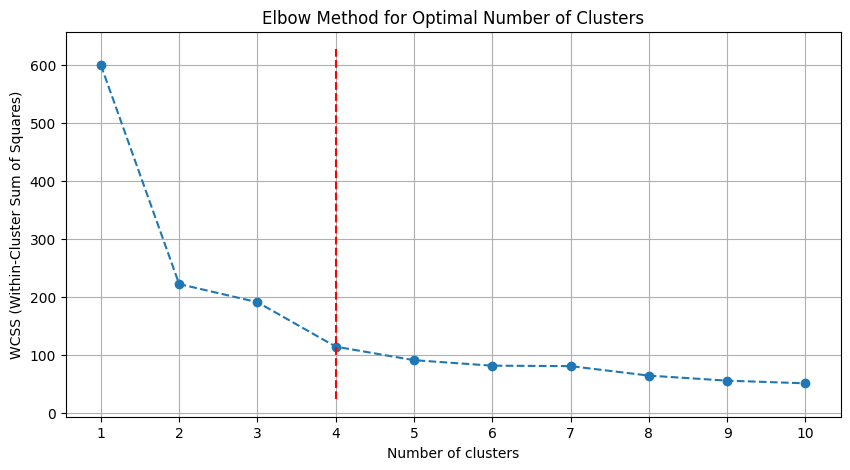

In [7]:
# Plot the Elbow graph with the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.vlines(optimal_clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [8]:
print(f"The optimal number of clusters determined by the Elbow Method is: {optimal_clusters}")

The optimal number of clusters determined by the Elbow Method is: 4


### 4. Run K-means with the Optimal Number of Clusters

In [9]:
# Run K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows of the clustered data
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


### End of Notebook